## The Sparks Foundation

### Task2- Prediction using Unsupervised machine

### Author - Rhythm Kaushik

#### dataset:- https://bit.ly/3kXTdox

In [2]:
# Importing the Liberary
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Loading the Iris dataset
df = pd.read_csv("D:\Data Science\Spark Foundation\DataSet/Iris.csv")

In [4]:
df.head() #Seeing the 5 Rows

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.shape

(150, 6)

In [6]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [9]:
df['Species'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

In [10]:
df[df['Species']== 'Iris-setosa'].head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
df[df['Species']== 'Iris-virginica'].head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
100,101,6.3,3.3,6.0,2.5,Iris-virginica
101,102,5.8,2.7,5.1,1.9,Iris-virginica
102,103,7.1,3.0,5.9,2.1,Iris-virginica
103,104,6.3,2.9,5.6,1.8,Iris-virginica
104,105,6.5,3.0,5.8,2.2,Iris-virginica


In [12]:
df[df['Species']== 'Iris-versicolor'].head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
50,51,7.0,3.2,4.7,1.4,Iris-versicolor
51,52,6.4,3.2,4.5,1.5,Iris-versicolor
52,53,6.9,3.1,4.9,1.5,Iris-versicolor
53,54,5.5,2.3,4.0,1.3,Iris-versicolor
54,55,6.5,2.8,4.6,1.5,Iris-versicolor


In [13]:
df.drop('Id',axis=1,inplace=True)
df.sample(1)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
35,5.0,3.2,1.2,0.2,Iris-setosa


#### Data Visualisation

In [14]:
import warnings as wgs
wgs.filterwarnings("ignore")

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

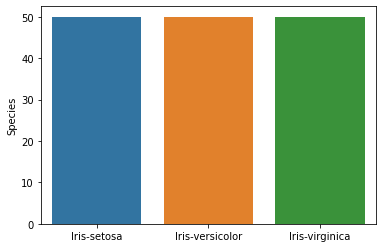

In [15]:
sns.barplot(x=df['Species'].unique(),y=df['Species'].value_counts())
df['Species'].value_counts()

##### There are 50 Iris-Setosa,50 Iris-Versicolor and Iris-Virinica in the dataset

In [16]:
df.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

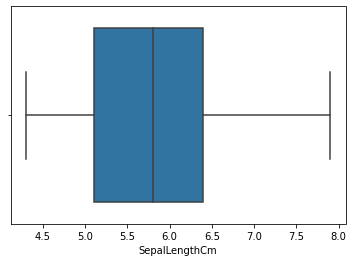

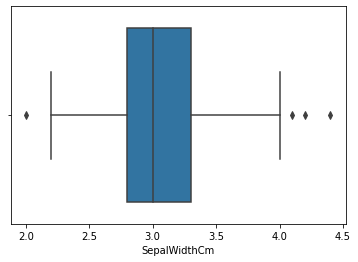

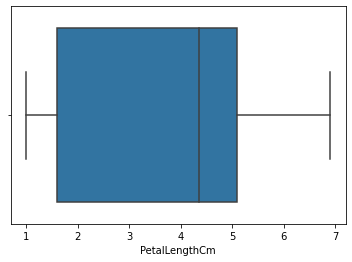

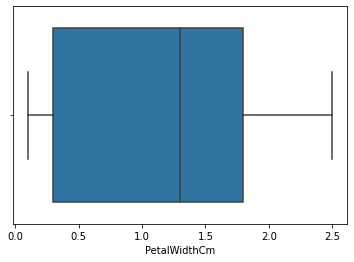

In [17]:
#cheacking outlier in dataset if any
for i in df.columns:
    if df[i].dtype=='float64': 
        sns.boxplot(df[i])
        plt.show() 

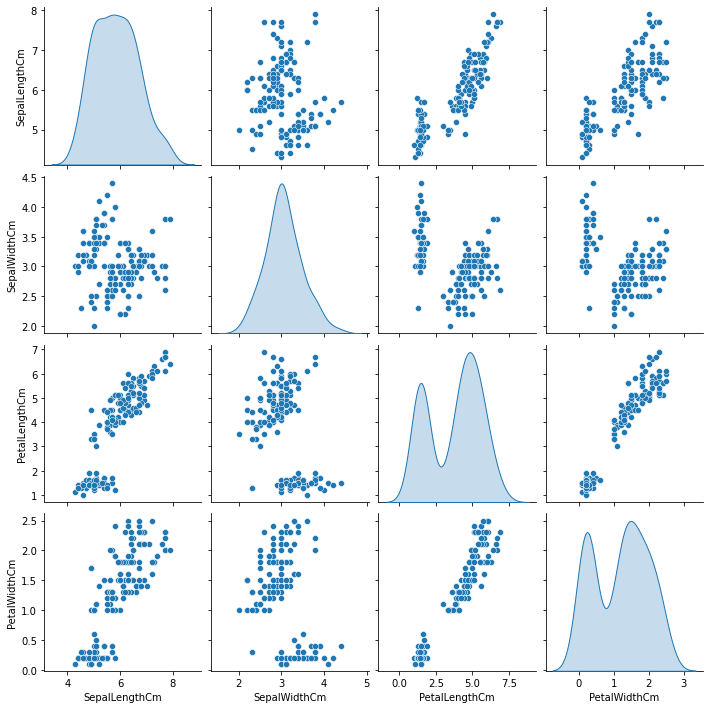

In [18]:
sns.pairplot(df,diag_kind='kde')

## Grouping the data into cluster

In [19]:
iris_df= df.drop('Species',axis=1)
iris_df.sample()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
146,6.3,2.5,5.0,1.9


In [20]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [23]:
x = iris_df.iloc[:, [0, 1, 2, 3]].values
cluster = range(1,10)
distortions=[]

for i in cluster:
    model = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter =100, n_init = 10, random_state = 0)
    model.fit(x)
    distortions.append(model.inertia_)

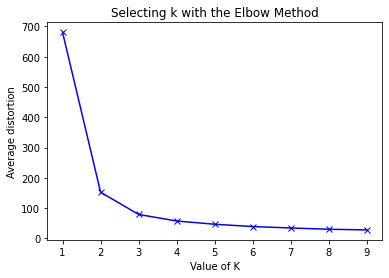

In [24]:
# Plotting the results onto a line graph 
# 'The Elbow Method'
plt.plot(cluster,distortions,'bx-')
plt.title("Selecting k with the Elbow Method")
plt.xlabel('Value of K')
plt.ylabel('Average distortion')
plt.show()

#### Value of k will be 3 as per the plot

In [26]:
# k=3
final_model = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
final_model.fit(x)
y_predict = final_model.predict(x)


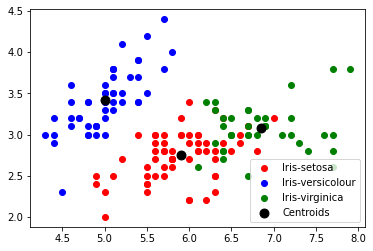

In [31]:
# Visualising the clusters 
plt.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_predict == 2, 0], x[y_predict == 2, 1], c = 'green', label = 'Iris-virginica')
plt.scatter(final_model.cluster_centers_[:, 0], final_model.cluster_centers_[:,1], 
            s = 80, c = 'black', label = 'Centroids')
plt.legend()
plt.show()

In [32]:
#Append the prediction 
df["GROUP"] = y_predict
iris_df["GROUP"] = y_predict
print("Groups Assigned : \n")
df.head(10)

Groups Assigned : 



,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,GROUP
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1
5,5.4,3.9,1.7,0.4,Iris-setosa,1
6,4.6,3.4,1.4,0.3,Iris-setosa,1
7,5.0,3.4,1.5,0.2,Iris-setosa,1
8,4.4,2.9,1.4,0.2,Iris-setosa,1
9,4.9,3.1,1.5,0.1,Iris-setosa,1


In [33]:
iris_df_clust = iris_df.groupby(['GROUP'])
iris_df_clust.mean()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
GROUP,,,,
0,5.901613,2.748387,4.393548,1.433871
1,5.006000,3.418000,1.464000,0.244000
2,6.850000,3.073684,5.742105,2.071053


0    [[AxesSubplot(0.1,0.559091;0.363636x0.340909),...
1    [[AxesSubplot(0.1,0.559091;0.363636x0.340909),...
2    [[AxesSubplot(0.1,0.559091;0.363636x0.340909),...
dtype: object

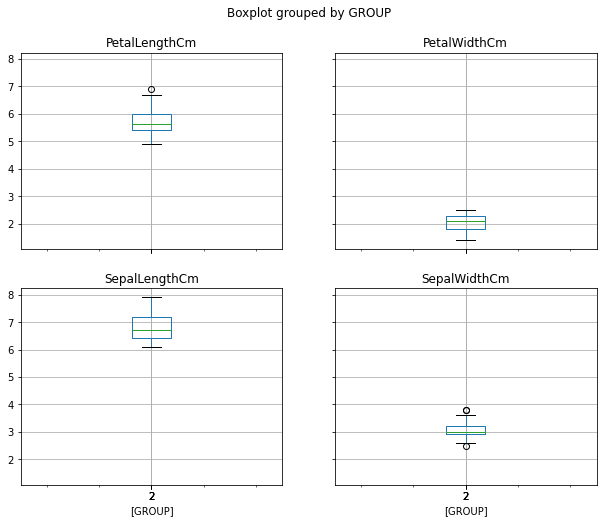

In [34]:
iris_df_clust.boxplot(by='GROUP', layout = (2,4), figsize = (10,8))